# Unsupervised Learning Applications


<h2>Table of Contents</h2>

<ol>
    <li>
        <a href="#1">Centroid-based clustering: K-Means</a>
    </li>
    <br>
    <li>
        <a href="#2">Density-based clustering: Density-Based Spatial Clustering of Applications with Noise (DBSCAN)</a>
    </li>
    <br>
</ol>


<hr id="1">
<h2>1. K-Means</h2>


Import required libraries.

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Read the data from `metal_etch.csv` into a Pandas `DataFrame`

In [3]:
# load the data
data = pd.read_csv('metal_etch.csv')
data.head()

,7.510000000000000000e+02,7.510000000000000000e+02.1,7.510000000000000000e+02.2,7.510000000000000000e+02.3,7.510000000000000000e+02.4,7.510000000000000000e+02.5,7.510000000000000000e+02.6,7.510000000000000000e+02.7,7.510000000000000000e+02.8,7.520000000000000000e+02,...,5.000000000000000000e+01.25,5.000000000000000000e+01.26,5.000000000000000000e+01.27,5.000000000000000000e+01.28,5.000000000000000000e+01.29,5.000000000000000000e+01.30,5.000000000000000000e+01.31,5.000000000000000000e+01.32,5.000000000000000000e+01.33,5.000000000000000000e+01.34
0,751.0,751.0,751.0,752.0,751.0,752.0,751.0,752.0,752.0,752.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
1,751.0,751.0,751.0,751.0,751.0,751.0,752.0,752.0,751.0,752.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
2,752.0,751.0,752.0,751.0,752.0,751.0,752.0,752.0,752.0,751.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
3,751.0,751.0,751.0,751.0,751.0,751.0,751.0,752.0,752.0,752.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
4,751.0,751.0,752.0,751.0,751.0,752.0,751.0,751.0,752.0,752.0,...,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0


In [ ]:
# data pre-processing
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_normal = scaler.fit_transform(data)

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
data_pcs = pca.fit_transform(data_normal)


In [5]:
# visualize in 3D as interactive plot
fig = px.scatter_3d(x = data_pcs[:,0], y = data_pcs[:,1], z = data_pcs[:,2])
fig.show()


Build, train, and evaluate a K-Means model.

In [6]:
# 1. import the necessary modules for the selected model (K-means)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 2. create the model
model = KMeans(n_clusters=3)

# 3. fit the model
model.fit(data_pcs)

# 4. predict the clusters
labels = model.predict(data_pcs)

# 5. evaluate the model
print('Silhouette Score:', silhouette_score(data_pcs, labels))

# 6. visualize the clusters
fig = px.scatter_3d(x = data_pcs[:,0], y = data_pcs[:,1], z = data_pcs[:,2], color = labels)
fig.show()


Silhouette Score: 0.7441436699798037


c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



### Silhouette Analysis: Evaluating Cluster Quality



Silhouette Score: 0.7441436699798037


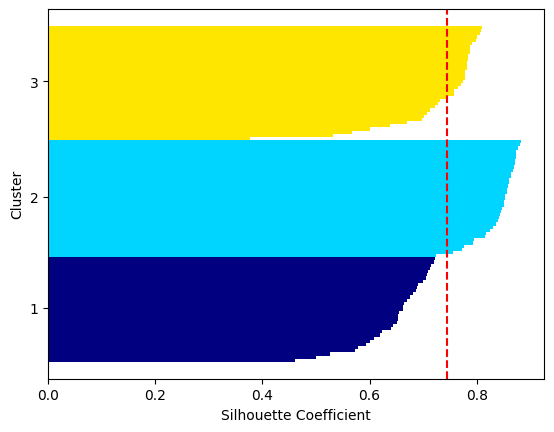

In [7]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

# Function to plot the silhouette values for each cluster
def plot_silhouette(data, labels):
    """
    Plot the silhouette values for each cluster.

    Parameters:
    - data (array-like): The data points in the principal component space.
    - labels (array-like): The cluster labels for each data point.

    Returns:
    - None
    """
    
    # Calculate the silhouette values for each sample
    silhouette_vals = silhouette_samples(data, labels, metric='euclidean')

    # Get the unique cluster labels
    cluster_labels = np.unique(labels)
    n_clusters = cluster_labels.shape[0]

    # Initialize variables for plotting
    y_ticks = []
    y_ax_lower = y_ax_upper = 0

    # Plot the silhouette values for each cluster
    for i, c in enumerate(cluster_labels):
        # Get the silhouette values for the current cluster
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()

        # Update the upper y-axis limit
        y_ax_upper += len(c_silhouette_vals)

        # Choose a color for the cluster
        color = cm.jet(float(i) / n_clusters)

        # Plot the silhouette values
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1, edgecolor='none', color=color)

        # Compute the new y_ax_lower for the next plot
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)

        # Update the lower y-axis limit for the next plot
        y_ax_lower += len(c_silhouette_vals)

    # Calculate the average silhouette score
    silhouette_avg = np.mean(silhouette_vals)

    # Print the silhouette score
    print('Silhouette Score:', silhouette_avg)

    # Plot the average silhouette score as a vertical line
    plt.axvline(silhouette_avg, color="red", linestyle="--")

    # Set the y-axis ticks and labels
    plt.yticks(y_ticks, cluster_labels + 1)

    # Set the x-axis and y-axis labels
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette Coefficient')

    # Display the plot
    plt.show()

# Plot the silhouette values
plot_silhouette(data_pcs, labels)

c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

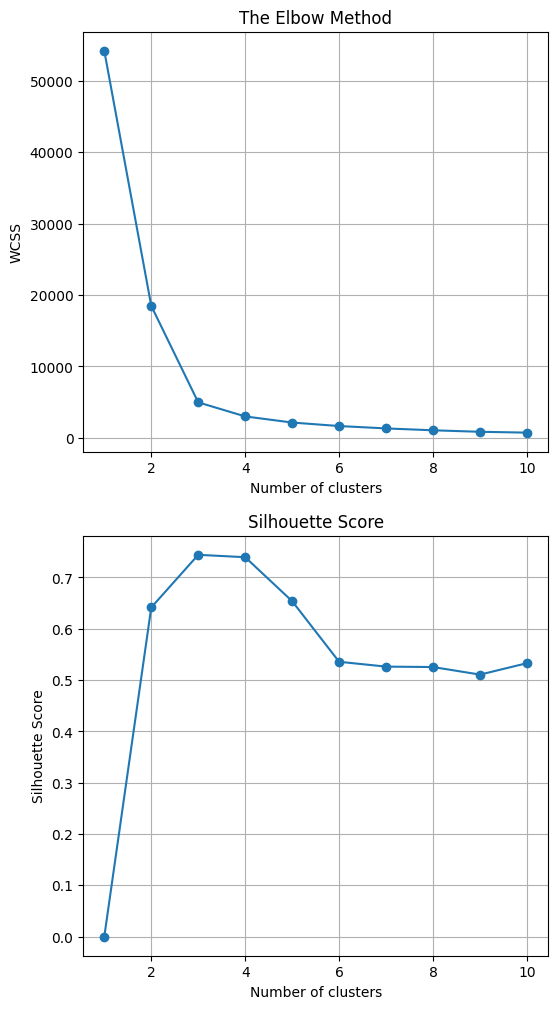

In [8]:
# calculate the within-cluster sum of squares (WCSS) for different number of clusters
# and silhouette scores
wcss = []
silhouette_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_pcs)
    wcss.append(kmeans.inertia_)
    labels = kmeans.predict(data_pcs)

    if i == 1:
        silhouette_scores.append(0)
    else:
        silhouette_scores.append(silhouette_score(data_pcs, labels))

# plot the elbow graph
plt.figure(figsize=(6, 12))
plt.subplot(2, 1, 1)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()

# plot the silhouette scores
plt.subplot(2, 1, 2)
plt.plot(range(1, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

<hr id="2">
<h2>2. Density-Based Spatial Clustering of Applications with Noise (DBSCAN)</h2>


Read the data from `metal_etch.csv` into a Pandas `DataFrame`

In [9]:
# load the data
data = pd.read_csv('Geomechanics.csv')
data.head()

,Closure Pressure (psi),YM (MMpsi),PR
0,11421.78048,4.744385,0.369135
1,10775.65592,4.745286,0.353307
2,11682.04701,4.734561,0.347007
3,10778.93270,4.744971,0.365548
4,9937.88314,4.751685,0.255453


In [10]:
# data pre-processing
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_normal = scaler.fit_transform(data)

In [11]:
# visualize in 3D as interactive plot
fig = px.scatter_3d(x = data_normal[:,0], y = data_normal[:,1], z = data_normal[:,2])
fig.update_traces(marker=dict(size=2))
fig.show()


### Guidelines for hyperparameters estimation:
1. **MinPts** = 2*dimensions
2. Plot samples sorted by distance on the x-axis versus k-th nearest neighbor
(KNN) distance on the y-axis where K = MinPts
3. **Epsilon** = the k-th distance value at the "elbow" in the graph

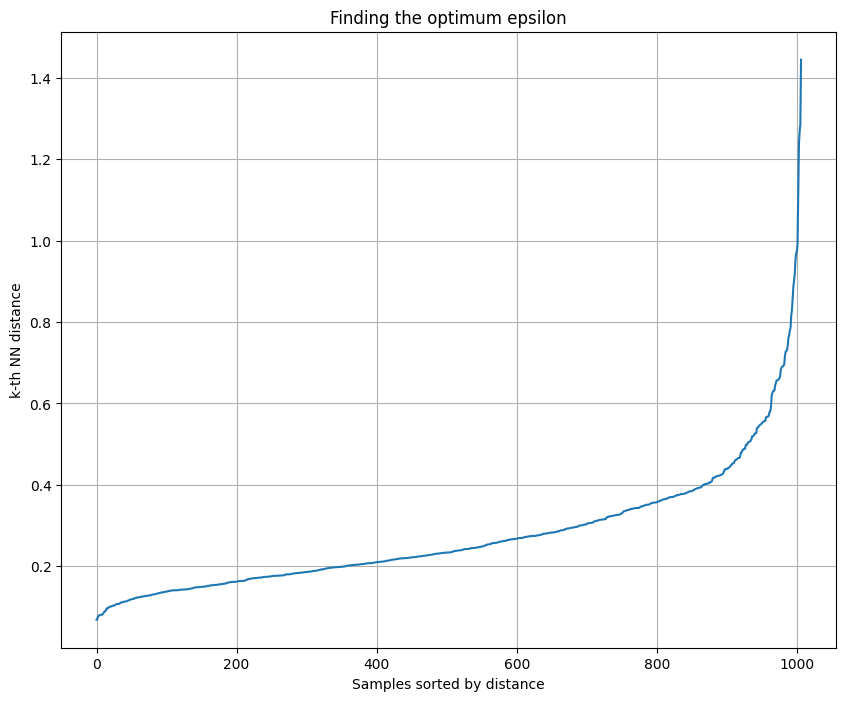

In [12]:
from sklearn.neighbors import NearestNeighbors
Neighbors = NearestNeighbors(n_neighbors=6)
nbrs = Neighbors.fit(data_normal)
distances, indices = nbrs.kneighbors(data_normal)
distances = np.sort(distances, axis=0)

# plot the distances
fig=plt.figure(figsize=(10,8))
distances = distances[:,-1]
plt.plot(distances)
plt.title('Finding the optimum epsilon')
plt.xlabel('Samples sorted by distance')
plt.ylabel('k-th NN distance')
plt.grid()
plt.show()

Build, train, and evaluate a K-Means model.

In [13]:
# 1. import the necessary modules for the selected model (DBSCAN)
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# 2. create the model
model = DBSCAN(eps=0.38, min_samples=8, metric='euclidean')

# 3. fit the model
model.fit(data_normal)

# 4. predict the clusters
labels = model.labels_

# 5. visualize the clusters
fig = px.scatter_3d(x = data_normal[:,0], y = data_normal[:,1], z = data_normal[:,2], color = labels)
fig.update_traces(marker=dict(size=2))
fig.show()

# 6. evaluate the model
# create dataframe
df = pd.DataFrame(data_normal, columns=['X', 'Y', 'Z'])
df['Cluster'] = labels

# filter out the noise points
df = df[df['Cluster'] != -1]

# calculate the silhouette score
print('Silhouette Score:', silhouette_score(df[['X', 'Y', 'Z']], df['Cluster']))

Silhouette Score: 0.4553196472324561


Silhouette Score: 0.4553196472324561


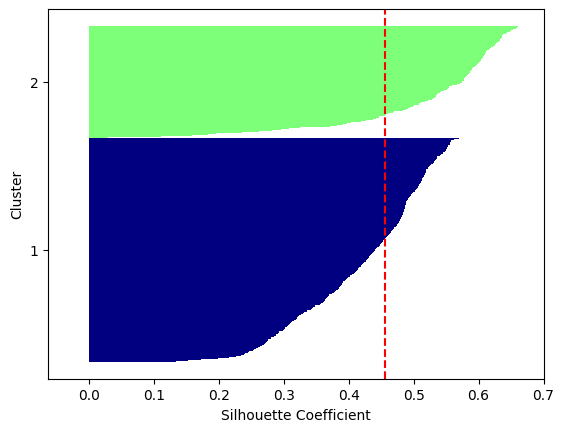

In [14]:
# plot the silhouette values
plot_silhouette(df[['X', 'Y', 'Z']], df['Cluster'])

---
## EXERCISE

c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

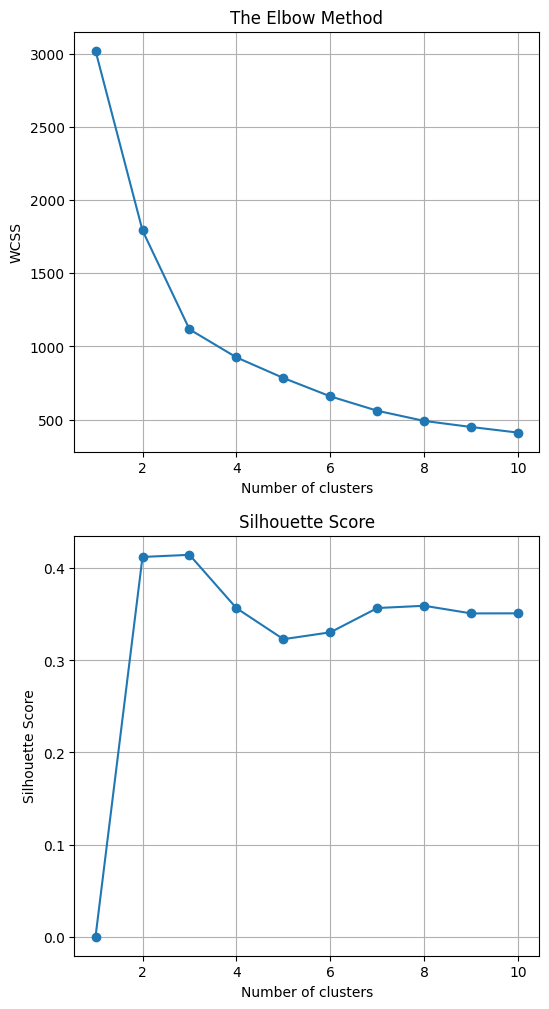

In [15]:
# use the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
silhouette_scores = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_normal)
    wcss.append(kmeans.inertia_)
    labels = kmeans.predict(data_normal)
    
    if i == 1:
        silhouette_scores.append(0)
    else:
        silhouette_scores.append(silhouette_score(data_normal, labels))

# plot the elbow graph
plt.figure(figsize=(6, 12))
plt.subplot(2, 1, 1)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()

# plot the silhouette scores
plt.subplot(2, 1, 2)
plt.plot(range(1, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [16]:
# visualize the clusters for the optimal number of clusters
model = KMeans(n_clusters=2)
model.fit(data_normal)
labels = model.predict(data_normal)

fig = px.scatter_3d(x = data_normal[:,0], y = data_normal[:,1], z = data_normal[:,2], color = labels)
fig.update_traces(marker=dict(size=2))
fig.show()

c:\Users\Nagdy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



<h2>References</h2>

- Hoss Belyadi, Alireza Haghighat, 2021. Machine Learning Guide for Oil and Gas Using Python
- Ankur Kumar, Jesus Flores-Cerrillo, 2022. Machine Learning in Python for Process Systems Engineering